# Chapter: Control Charts for Statistical Process Control


# Topic: CUSUM control chart-based monitoring of aeration tank

In [2]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})
np.random.seed(10)

In [3]:
# read data
data = np.loadtxt('aeration-rate.csv', skiprows=1)
NOC_data = data[:200]
test_data = data[200:]

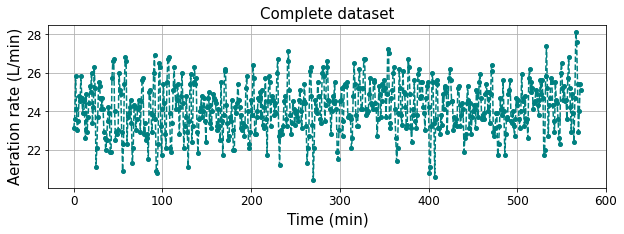

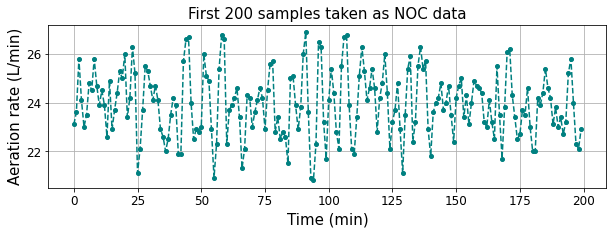

In [4]:
# plots
plt.figure(figsize=(10,3))
plt.plot(data,'--',marker='o', markersize=4, color='teal')
plt.xlabel('Time (min)', fontsize=15), plt.ylabel('Aeration rate (L/min)', fontsize=15)
plt.title('Complete dataset', fontsize=15)
plt.grid()

plt.figure(figsize=(10,3))
plt.plot(NOC_data,'--',marker='o', markersize=4, color='teal')
plt.xlabel('Time (min)', fontsize=15), plt.ylabel('Aeration rate (L/min)', fontsize=15)
plt.title('First 200 samples taken as NOC data', fontsize=15)
plt.grid()

plt.show()

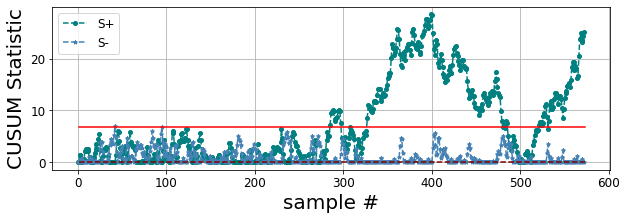

In [5]:
# CUSUM chart
mu, sigma = np.mean(NOC_data), np.std(NOC_data)
k, H = 0.25*sigma, 5*sigma

S_positive = np.zeros((len(data),))
S_negative = np.zeros((len(data),))

S_positive[0], S_negative[0] = 0, 0

for i in range(1,len(data)):
    S_positive[i] = np.max([0, data[i]-(mu+k) + S_positive[i-1]])
    S_negative[i] = np.max([0, (mu-k)-data[i] + S_negative[i-1]])

plt.figure(figsize=(10,3))
plt.plot(S_positive,'--',marker='o', markersize=4, color='teal', label='S+')
plt.plot(S_negative,'--',marker='*', markersize=4, color='steelblue', label='S-')
plt.plot([1,len(data)],[H,H], color='red'), plt.plot([1,len(data)],[0,0], '--', color='maroon')
plt.xlabel('sample #', fontsize=20), plt.ylabel('CUSUM Statistic', fontsize=20)
plt.grid()
plt.legend()

plt.show()